Text(0.5, 0, 'source image')

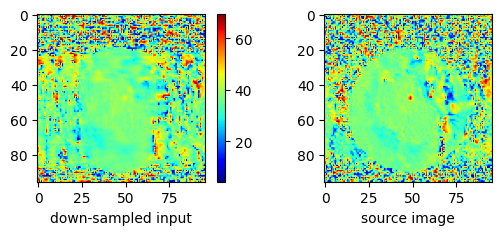

In [16]:
"""Dubug fastmrt.data"""

from fastmrt.data.dataset import SliceDataset, VolumeDataset
from fastmrt.data.mask import EquiSpacedMaskFunc
from fastmrt.data.augs import ComplexAugs, IdentityAugs
from fastmrt.data.prf import PrfFunc, PrfHeader
from fastmrt.data.transforms import FastmrtDataTransform2D
from fastmrt.utils.trans import real_tensor_to_complex_np as rt2cn
from fastmrt.utils.normalize import denormalize
import matplotlib.pyplot as plt
import numpy as np
import torch

# assign data root
data_root  = '../Datasets/FastMRT Dataset V3.1/train/'

# define mask function
mask_func = EquiSpacedMaskFunc(center_fraction=0.15, acceleration=4)

# define augmentation function
# augs_func = ComplexAugs(96, 96, True, objs=["amp"])
augs_func = IdentityAugs()

# define prf function
prf_header = PrfHeader(B0=3, gamma=42.576, alpha=0.01, TE=12)
prf_func = PrfFunc(prf_header)

# define data transforms
transforms = FastmrtDataTransform2D(mask_func=mask_func, prf_func=prf_func, aug_func=augs_func, data_format='TM')

# define dataset
slice_dataset = SliceDataset(root=data_root, transform=transforms)

# test dataset
sample = slice_dataset[995]
input = denormalize(sample.input, sample.mean, sample.std)
label = denormalize(sample.label, sample.mean, sample.std)
# input_ref = denormalize(sample.input_ref, sample.mean, sample.std)
# label_ref = denormalize(sample.label_ref, sample.mean, sample.std)
input = rt2cn(input) if sample.input.ndim > 2 else input
label = rt2cn(label) if sample.label.ndim > 2 else label
# input_ref = rt2cn(input_ref) if sample.input_ref.ndim > 2 else input_ref
# label_ref = rt2cn(label_ref) if sample.label_ref.ndim > 2 else label_ref

# plots
cmap = 'jet'
plt.subplot(2, 2, 1)
plt.imshow(np.abs(input), cmap=cmap)
plt.xlabel("down-sampled input")
plt.colorbar()
plt.subplot(2, 2, 2)
plt.imshow(np.abs(label), cmap=cmap)
plt.xlabel("source image")
# plt.subplot(2, 2, 3)
# plt.colorbar()
# plt.imshow(np.abs(input_ref), cmap=cmap)
# plt.xlabel("down-sampled input ref")
# plt.colorbar()
# plt.subplot(2, 2, 4)
# plt.imshow(np.abs(label_ref), cmap=cmap)
# plt.xlabel("source image ref")
# plt.colorbar()
# plt.show()